In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Part-I

In [3]:
# Exploring the dataset

1. Dataset Overview:

The fMNIST dataset is a collection of grayscale images representing various clothing items, such as t-shirts, trousers, sneakers, etc.
It serves as a direct replacement for the original MNIST dataset but provides a more challenging classification problem.
The dataset contains 60,000 training images and 10,000 test images.
Each image has a size of 28x28 pixels.
2. Labels:

There are a total of 10 labels corresponding to different fashion categories.
The labels are represented as integers ranging from 0 to 9, where each integer represents a specific clothing item.

3. Data Split:

The dataset is divided into two sets: a training set and a test set.
The training set consists of 60,000 images along with their corresponding labels.
The test set contains 10,000 images and their respective labels.

4.Image Examples:

You can visualize and examine the dataset by plotting some sample images using libraries like Matplotlib or OpenCV.

5. Data Preprocessing:

It's essential to preprocess the data before feeding it to a machine learning model.
Typically, the pixel values are scaled to a range between 0 and 1 to improve training efficiency and convergence.
You may also consider reshaping the input images if necessary to match the expected input shape of your model.

# Part-II

In [6]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# Load the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
# Preprocessing

In [11]:
# Normalize pixel values to a range between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [12]:
# Flatten the images from 28x28 to a 1D array of 784 pixels
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

In [13]:
# Convert the labels to categorical one-hot encoding
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [14]:
# Create the neural network model.

In [15]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
# Compile the model

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model.

In [19]:
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 17ms/step - loss: 0.5328 - accuracy: 0.8150 - val_loss: 0.4099 - val_accuracy: 0.8490
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3812 - accuracy: 0.8637 - val_loss: 0.3695 - val_accuracy: 0.8674
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3418 - accuracy: 0.8736 - val_loss: 0.3477 - val_accuracy: 0.8758
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3140 - accuracy: 0.8835 - val_loss: 0.3454 - val_accuracy: 0.8761
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2973 - accuracy: 0.8898 - val_loss: 0.3371 - val_accuracy: 0.8783
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2763 - accuracy: 0.8968 - val_loss: 0.3220 - val_accuracy: 0.8841
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2623 - accuracy: 0.9029 - val_loss: 0.3099 - val_accuracy: 0.8903
Epoc

# Part-III

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3515 - accuracy: 0.8825
Test accuracy: 0.8824999928474426


In [24]:
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

313/313 [==============================] - 1s 2ms/step


In [25]:
# Compute confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[851   0  10  32   1   0 103   0   3   0]
 [  3 962   0  27   3   0   5   0   0   0]
 [ 16   1 825  19  57   0  81   0   1   0]
 [ 18   2   8 929  23   0  17   0   3   0]
 [  3   0 144  45 740   0  68   0   0   0]
 [  0   0   0   1   0 945   0  37   1  16]
 [124   0  88  40  51   0 688   0   9   0]
 [  0   0   0   0   0   3   0 951   0  46]
 [ 11   0   1   9   2   1   6   4 966   0]
 [  0   0   0   0   0   9   1  22   0 968]]


In [26]:
# Explore specific examples of incorrect classifications
incorrect_indices = np.where(predicted_labels != true_labels)[0]

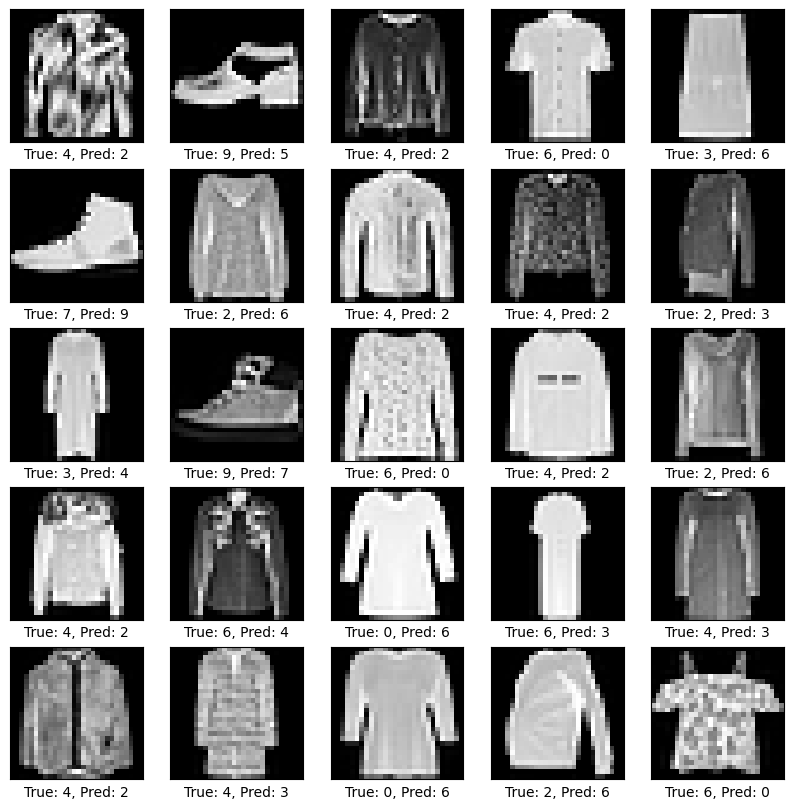

In [27]:
# Plot some examples of incorrect classifications
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
plt.show()